<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sy
from scipy.integrate import simps
from scipy.integrate import quad

#Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [ ]:
i = np.array([3.10,3.12,3.14,3.18,3.24])
t = np.array([1.00,1.01,1.02,1.03,1.04])

In [ ]:
data = {"t":t, "i": i}
df = pd.DataFrame(data)
df.head()

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


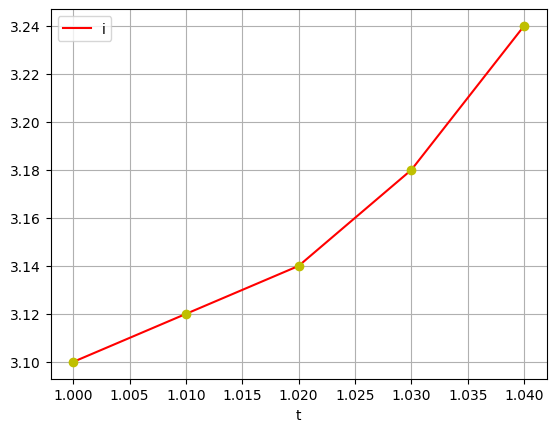

In [ ]:
df.plot.line(x="t", y="i",color="r",)
plt.plot(df["t"],df["i"],"yo")
plt.grid()
plt.show()

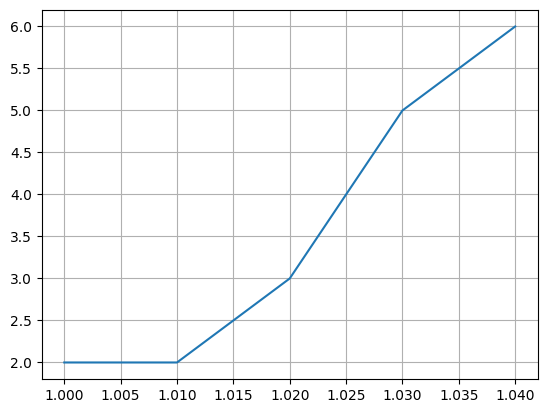

In [ ]:
derivada = np.gradient(df["i"],df["t"])
plt.plot(df["t"],derivada,label="Derivdad de Primer orden")
plt.grid()
plt.show()

In [ ]:
L = 0.98
R = 0.142
i = df["i"]
E_t = L*derivada*R*i
df["Fem(v)"]=E_t
df.head()

,t,i,Fem(v)
0,1.00,3.10,0.862792
1,1.01,3.12,0.868358
2,1.02,3.14,1.310887
3,1.03,3.18,2.212644
4,1.04,3.24,2.705270


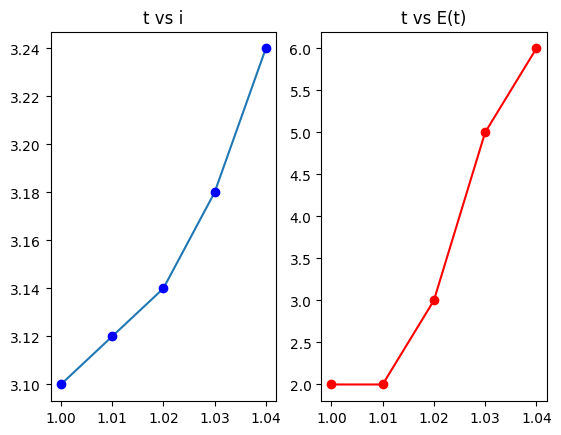

In [ ]:
fig,axs = plt.subplots(1,2)
axs[0].plot(t,i)
axs[0].plot(t,i,"bo")
axs[0].set_title("t vs i")
axs[1].plot(t,derivada,"r")
axs[1].plot(t,derivada,"ro")
axs[1].set_title("t vs E(t)")
plt.show()

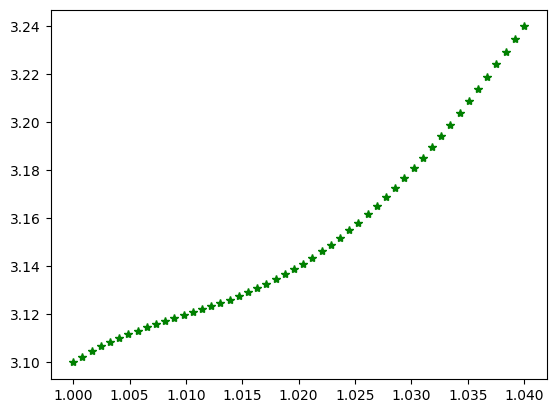

In [ ]:
PL = sc.interpolate.lagrange(t,i)
xL = np.linspace(np.min(t),np.max(t))
iL= PL(xL)
plt.plot(xL,iL,"g*")

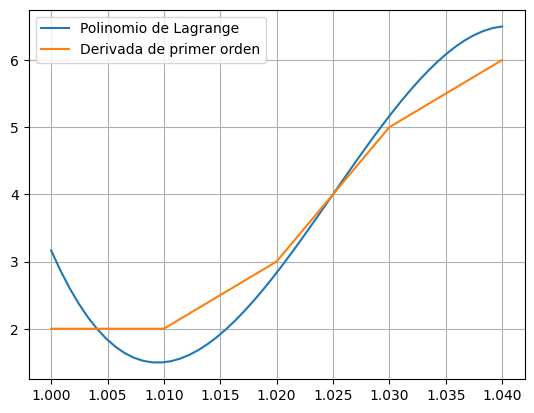

In [ ]:
h = 1e-4
derivada1 = 1/(2*h)*(-3*PL(xL)+4*PL(xL+h)-PL(xL+2*h))
plt.plot(xL,derivada1,label="Polinomio de Lagrange")
plt.plot(t,derivada,label= "Derivada de primer orden")
plt.legend()
plt.grid()
plt.show()

##**Parte 2**

1.La expresión para calcular una integral con la regla del trapecio.

$$\int_a^{b}f(x)≈\frac{h}{2}[f(x_0)+f(x_n)+2\sum_{i=1}^{n-1} f(x_i)]$$

$$h=\frac{b-a}{n}$$

2. La expresión para calcular una integral con la regla del simpson.

$$\int_a^{b}f(x)≈\frac{h}{3}[f(x_0)+f(x_n)+2\sum_{i=1}^{n/2-1} f(x_{2i})+4\sum_{i=1}^{n/2} f(x_{2i-1})]$$

$$h=\frac{b-a}{n}$$

3. La expresión para calcular una integral con el metodo de cuadratura.

$$\int_a^{b} f(x) \approx \sum_{i=1}^{n} w_i \cdot f(x_i)$$

* Donde $w_i$ son los pesos asociados a los puntos de cuadratura $x_i$.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
f = lambda x: 1/np.sqrt(np.tan(x))
n = 1000000
h = ((np.pi/2)-1e-8)/n
x = np.linspace(1e-8,np.pi/2,n)
i = range(1,n)
intf = (h/2)*(f(1e-8)+f(np.pi/2)+(2*np.sum(f(x[i]))))
intf

2.2274525503672744

**Regla del Trapecio**

In [ ]:
a = 1e-8
b = np.pi / 2
f = lambda x: 1/np.sqrt(np.tan(x))
x_values = np.linspace(a, b, n)
f_values = f(x_values)
integral_value = np.trapz(f_values, x_values)
integral_value

2.2274547778220395

In [ ]:
a = 0
b = np.inf
f = lambda x: np.cos(x)/x**3
x_values = np.linspace(a, b, 10000)
f_values = f(x_values)
integral_value = np.trapz(f_values, x_values)
integral_value

<ipython-input-18-0e326fa6182c>:3: RuntimeWarning: invalid value encountered in cos
  f = lambda x: np.cos(x)/x**3


nan

In [ ]:
f = lambda y: 1/np.sqrt(1-y**2)
x = np.linspace(0, np.pi/4 , 1000)
U = np.zeros(1000)

for i, x_ in enumerate(x):
    y = np.linspace(0, np.sin(x_), 1000)
    I_1 = np.trapz(f(y), y) # Integral respecto a y
    U[i] = I_1

II = np.trapz(U, x) # Intregral respecto a x
II

0.3084251503452092

**Regla de Simpson**

In [ ]:
def f(x):
    return 1 / np.sqrt(np.tan(x))
n = 10000000
x_values = np.linspace(a, b, n)
f_values = f(x_values)
integral_value=simps(f_values, x_values)
integral_value

2.2214309594391692

In [ ]:
def f(x):
    return np.cos(x) / x**3
a = 1
b = np.inf
n = 10000000
x_values = np.linspace(a, b, n)
f_values = f(x_values)
integral_value=simps(f_values, x_values)
integral_value

<ipython-input-8-b823f2fe92d8>:2: RuntimeWarning: invalid value encountered in cos
  return np.cos(x) / x**3


nan

In [ ]:
f = lambda y: 1/np.sqrt(1-y**2)
x = np.linspace(0, np.pi/4 , 1000)
U = np.zeros(1000)

for i, x_ in enumerate(x):
    y = np.linspace(0, np.sin(x_), 1000)
    I_1 = simps(f(y), y) # Integral respecto a y
    U[i] = I_1

II = simps(U, x) # Intregral respecto a x
II

0.3084251375341329

**Metodo de Cuadratura**

In [ ]:
def f(x):
    return 1 / np.sqrt(np.tan(x))
def integrate_f():
    result, _ = quad(f, 1e-8, np.pi/2)
    return result
integral_value = integrate_f()
integral_value

2.22144146938126

In [ ]:
def f(x):
    return np.cos(x) / x**3
def integrate_f():
    result, _ = quad(f, 1, np.inf,limit= 1000)
    return result
integral_value = integrate_f()
integral_value

0.018117622548772427

In [ ]:
f = lambda x, y: 1/np.sqrt(1-y**2)

def F(x):
    return quad(lambda y: f(x, y), 0, np.sin(x))[0]

x = np.linspace(0, np.pi/4, 10000, endpoint=True)

II, _ = quad(F, 0, np.pi/4)
print(II)

0.30842513753404244


## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

Para un péndulo simple:

*   El momento de inercia $I_o = {\frac{1}{3}}ml^2$
*   $b$ es la distancia  entre el centro de masa del péndulo y el punto de suspensión, entonces $b$ sería simplemente la longitud del hilo o la distancia desde el punto de suspensión hasta el centro de masa de la masa puntual.
*   $\theta_o$ es la amplitud de las oscilacione(angulo máximo). Como $\sin(\theta_o)=\frac{h}{l}$.  donde $h$ es la altura inicial, de la que se dejo caer el pendulo, entonce $\arcsin(\frac{h}{l})= \theta_o$





In [ ]:
def I(m,l):
  Io= (1/3)*m*l**2
  return Io

In [ ]:
def Po(m,l):
  Io = I(m,l)
  g = 9.8 # Gravedad (mts/sg^2)
  b = l/2
  r_ = m*g*b
  r = 2*np.pi*np.sqrt(Io / r_)
  return r

Utilice dos metodos trapecio y cuadratura para comparar resultados. Mas abajo utilizo trapecio manualmente (codigo).  

In [ ]:
def integral_phi(k):
  f = lambda phi,k: 1/np.sqrt(1-(k**2*np.sin(phi)**2))
  resultado, error = quad(f, 0, np.pi/2, args=(k,))
  return resultado

In [ ]:
def integral_phi(k):
  f = lambda phi: 1/np.sqrt(1-(k**2*np.sin(phi)**2))
  theta = np.linspace(0, np.pi/2, 10000)
  f_ = f(theta)
  integral = np.trapz(f_, theta)
  return integral

In [ ]:
def P(m,l,h):
  P_o = Po(m,l)
  theta_o = np.arcsin(h/l)
  k = np.sin(theta_o/2)
  integral = integral_phi(k)
  p = (2*P_o/np.pi) * integral
  return p

In [ ]:
m = 1 # Masa (kg)
l = 0.10 # Longitud (mts)
h = 0.05 # Altura (mts)
P(m,l,h) # Periodo (sg)

0.5272501229273843

**Regla del trapecio**

In [ ]:
f = lambda phi: 1/np.sqrt(1-(k**2*np.sin(phi)**2))
h_ = 0.05
theta_o = np.arcsin(h_/l)
k = np.sin(theta_o/2)

# Integral
n = 10000
h = (np.pi/2)/n # h = b-a/n
x = np.linspace(0,np.pi/2,n) # l = longitud del pendulo, entonces tambien es la maxima distancia en el eje x
i = range(1,n)
intf = (h/2)*(f(0)+f(np.pi/2)+(2*np.sum(f(x[i]))))

# Periodo
P_o = Po(m,l)
p = (2*P_o/np.pi) * intf
p

0.5272510488658868

## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [ ]:
m = 0.5
m_1 = 1-m
epsilon_m = 3*(10**-3) # coloco 10**-3 por que epsilon(m) es <= 3*10**-5.
a_0 = 1.3862944
b_0 = 0.5
a_1 = 0.1119723
b_1 = 0.1213478
a_2 = 0.00725296
b_2 = 0.0288729

In [ ]:
ter1 = a_0 + a_1*m_1 + a_2*m_1
ter2 = (b_0 + b_1*m_1 + b_2*m_1**2) * np.log(m_1)
k = ter1-ter2 + epsilon_m
k

1.842539855305946

In [ ]:
def k_integrando(m):
  k = lambda phi,m: 1 / np.sqrt(1 - m * np.sin(phi)**2)
  resultado, error = quad(k,0,np.pi/2,args=(m,))
  return resultado

In [ ]:
k_integrando(m)

1.854074677301372

si quiero econtrar $\epsilon(m)\leq 3\times 10^{-5}$

In [ ]:
k_ = np.linspace(3*(10**-1.5),3*(10**-3))
t = np.array([])
for i in k_:
  r =  ter1-ter2 + i
  t = np.append(t,r)
t

array([1.93440819, 1.93253332, 1.93065846, 1.92878359, 1.92690873,
       1.92503387, 1.923159  , 1.92128414, 1.91940927, 1.91753441,
       1.91565955, 1.91378468, 1.91190982, 1.91003495, 1.90816009,
       1.90628523, 1.90441036, 1.9025355 , 1.90066064, 1.89878577,
       1.89691091, 1.89503604, 1.89316118, 1.89128632, 1.88941145,
       1.88753659, 1.88566172, 1.88378686, 1.881912  , 1.88003713,
       1.87816227, 1.87628741, 1.87441254, 1.87253768, 1.87066281,
       1.86878795, 1.86691309, 1.86503822, 1.86316336, 1.86128849,
       1.85941363, 1.85753877, 1.8556639 , 1.85378904, 1.85191417,
       1.85003931, 1.84816445, 1.84628958, 1.84441472, 1.84253986])

In [ ]:
epsilon_m = k_[-7]
ter1 = a_0 + a_1*m_1 + a_2*m_1
ter2 = (b_0 + b_1*m_1 + b_2*m_1**2) * np.log(m_1)
k = ter1-ter2 + epsilon_m
k

1.853789038547381

# Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
def A_(r,theta,I,a):
  n = 4*I*a
  d = np.sqrt(a**2+r**2+(2*a*r*np.sin(theta)))
  p1 = n/d
  k_2 = calculate_k_cuadrado(r,theta,a )
  k = np.sqrt(k_2)
  p2 = (((2-k_2)* integrate_K(k)) - 2*integrate_E(k))/k_2
  return p1*p2

In [ ]:
@np.vectorize
def integrate_K(k):
  f = lambda phi,k: 1/np.sqrt(1-k**2*(np.sin(phi)**2))
  K, _ = quad(f, 0, np.pi/2,args=(k,))
  return K

In [ ]:
@np.vectorize
def integrate_E(k):
  g = lambda phi,k: np.sqrt(1-k**2*(np.sin(phi))**2 )
  E, _ = quad(g, 0, np.pi/2,args=(k,))
  return E

In [ ]:
def calculate_k_cuadrado(r,theta,a):
  n = 4*a*r*np.sin(theta)
  d = a**2+r**2+(2*a*r*np.sin(theta))
  k = n/d
  return k

In [ ]:
a = 1
I = 3
r = np.linspace(0.1,5)
theta = np.pi/4

In [ ]:
A = A_(r,theta,I,a)

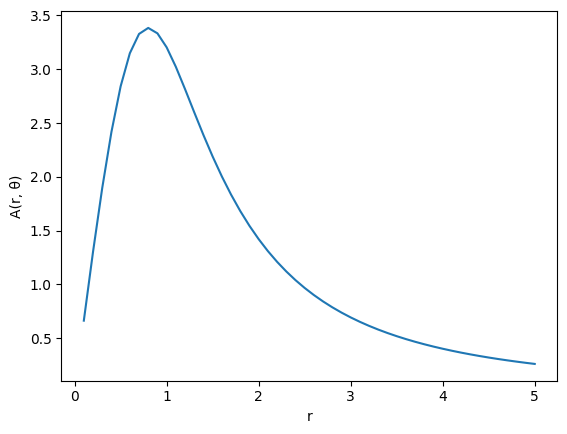

In [ ]:
plt.plot(r,A)
plt.xlabel("r")
plt.ylabel("A(r, θ)")
plt.show()